# Bayesian Latent Model with Synthetic Data

## Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from data.synthetic import Generator
from utils import helper_functions as hf

## Metadata for the Model

In [36]:
n = 500
d = [3, 4]
q = 2
min_len = 15
max_len = 20
max_time = 21

## Model

In [37]:
model = Generator(n, d, q, min_len, max_len, max_time)

## Meta Data

In [38]:
model_metadata = model.metadata
model_metadata

{'n': 500, 'd': [3, 4], 'q': 2, 'min_len': 15, 'max_len': 20, 'max_time': 21}

## Attributes

In [39]:
model_attributes = model.attributes

## Parameters

In [40]:
model_params = model.params
model_params

{'mu': [array([-0.77302306,  0.94896619,  0.45746927]),
  array([-0.96501946,  0.78314653, -0.43027767, -0.40204725])],
 'omega': [array([-0.29706439,  0.41521028,  0.5992092 ]),
  array([ 0.58406852, -0.35105881,  0.72942077, -0.10497474])],
 'w': [array([[ 0.29112371, -0.17080079],
         [ 0.41206202, -0.50670124],
         [-0.48801514, -0.95197729]]),
  array([[ 0.09645981, -0.28565601],
         [-0.77537595, -0.71620569],
         [-0.11008185,  0.46396045],
         [-0.07979754,  0.18548882]])],
 'v': [array([[-0.80254809, -0.39912713],
         [ 0.28171136, -0.3555841 ],
         [-0.62901172,  0.8343871 ]]),
  array([[-0.32657229, -0.09114436],
         [-0.62574445, -0.18232957],
         [-0.73579592, -0.92577937],
         [-0.83602434, -0.5731201 ]])],
 'sigma2': [1.27092080337477, 1.5452292637147478]}

## Time Sequence Plot

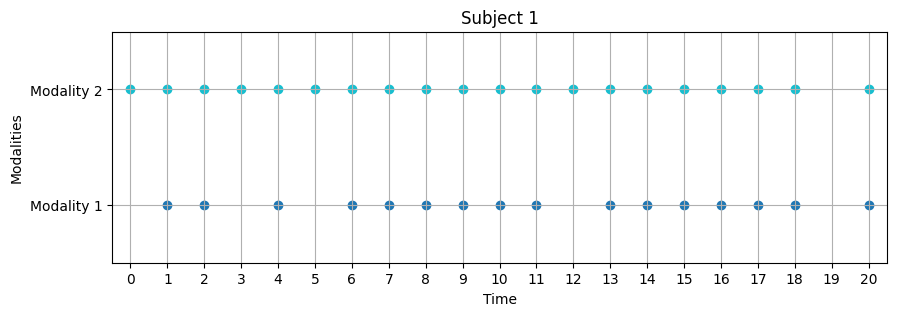

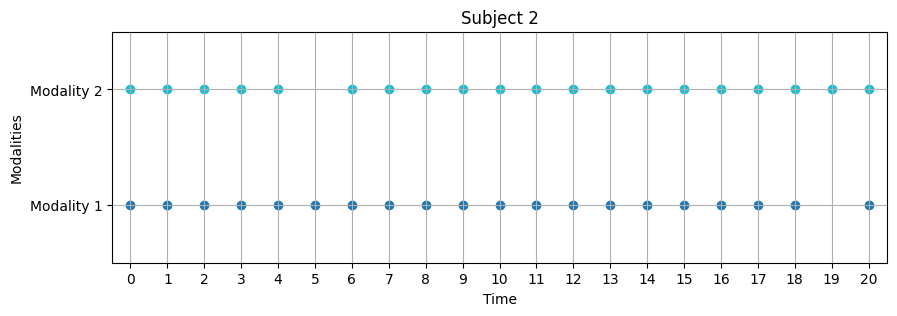

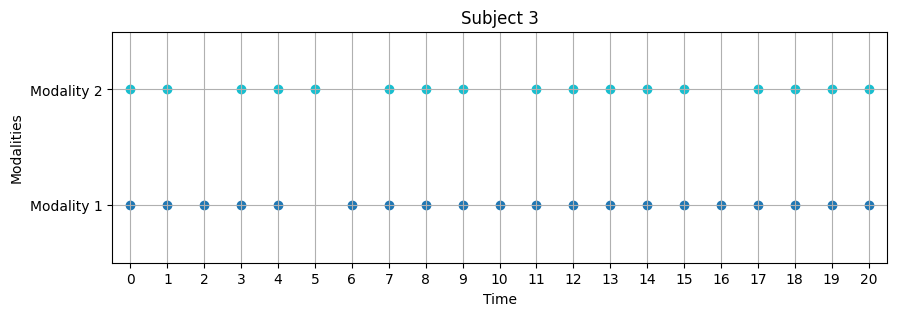

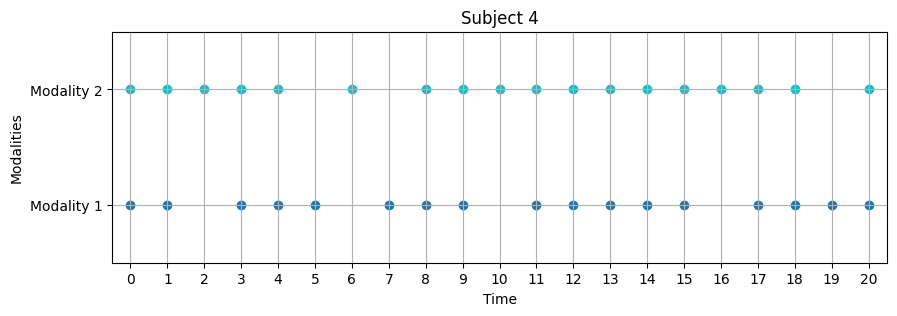

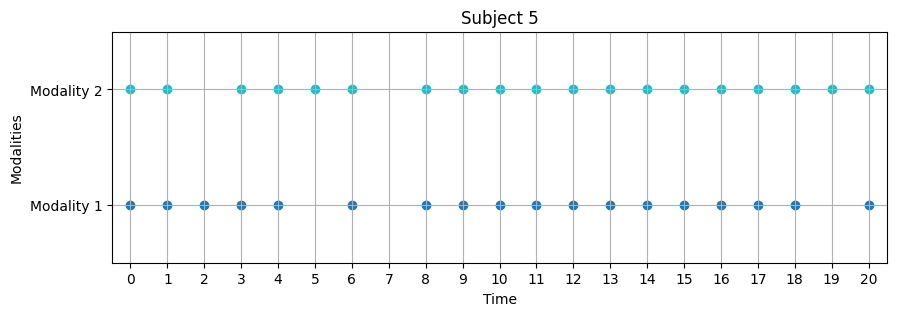

In [41]:
model.plot_t(subject_indices=[0, 1, 2, 3, 4])

## Data Generation

x_actual, y_actual = model.generate_data(gaussian=False, gaussian_prob=0.75)

In [42]:
d = model.metadata['d']
n = model.metadata['n']
t = model.attributes['t']
w_actual = model.params['w']
v_actual = model.params['v']
omega_actual = model.params['omega']
mu_actual = model.params['mu']
sigma2_actual = model.params['sigma2']

## Input Latent Data

In [43]:
def generate_spiral(n, noise=0.1, seed=52):
    if seed is not None:
        rnd = np.random.RandomState(seed)
    else:
        rnd = np.random.default_rng()

    # Generate uniformly spaced "time" values between 0 and 2
    t = np.linspace(0, 2, n)

    # Generate x and y coordinates for the spiral
    x = t * np.cos(t)
    y = t * np.sin(t)

    # Add some Gaussian noise to x and y coordinates
    x += rnd.normal(scale=noise, size=n)
    y += rnd.normal(scale=noise, size=n)

    return np.column_stack([x, y])

In [44]:
x_actual = generate_spiral(n)

In [45]:
x = x_actual
w = w_actual
v = v_actual
omega = omega_actual
mu = mu_actual
sigma2 = sigma2_actual
y = []
noise = True
for i in range(n):
    y_n = []
    for k in range(len(d)):
        y_nk = ((t[i][k].reshape(-1, 1, 1) * w[k] + v[k]) * x[i]).sum(2) + t[i][k].reshape(-1, 1) * omega[k] + mu[k]
        if noise:
            epsilon = np.array([])
            for j in range(len(t[i][k])):
                rnd = np.random.RandomState(23 + i + k + j)
                eps = rnd.multivariate_normal(np.zeros(d[k]),
                                                    np.eye(d[k]) * sigma2[k])
                epsilon = np.append(epsilon, eps)
            epsilon = epsilon.reshape(len(t[i][k]), d[k])
            y_nk += epsilon
        y_n.append(y_nk)
    y.append(y_n)

y_actual = y

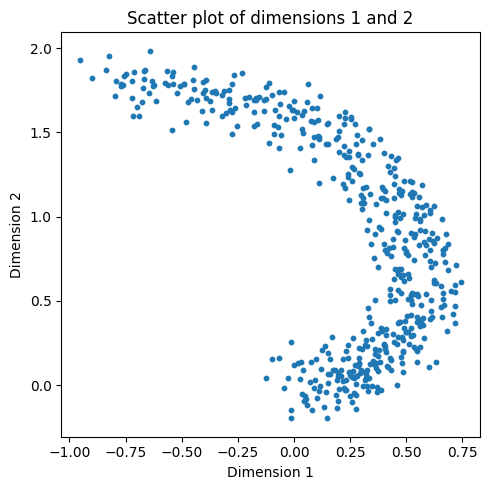

In [46]:
hf.plot_scatter_pairs_latent(x_actual)

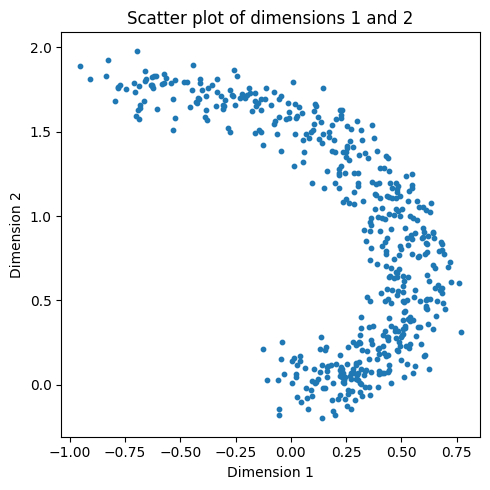

In [47]:
x_from_y, _, _ = hf.encode(y_actual, w_actual, v_actual, mu_actual, omega_actual, sigma2_actual, t, seed=None)
hf.plot_scatter_pairs_latent(x_from_y)

## Input Observed Data

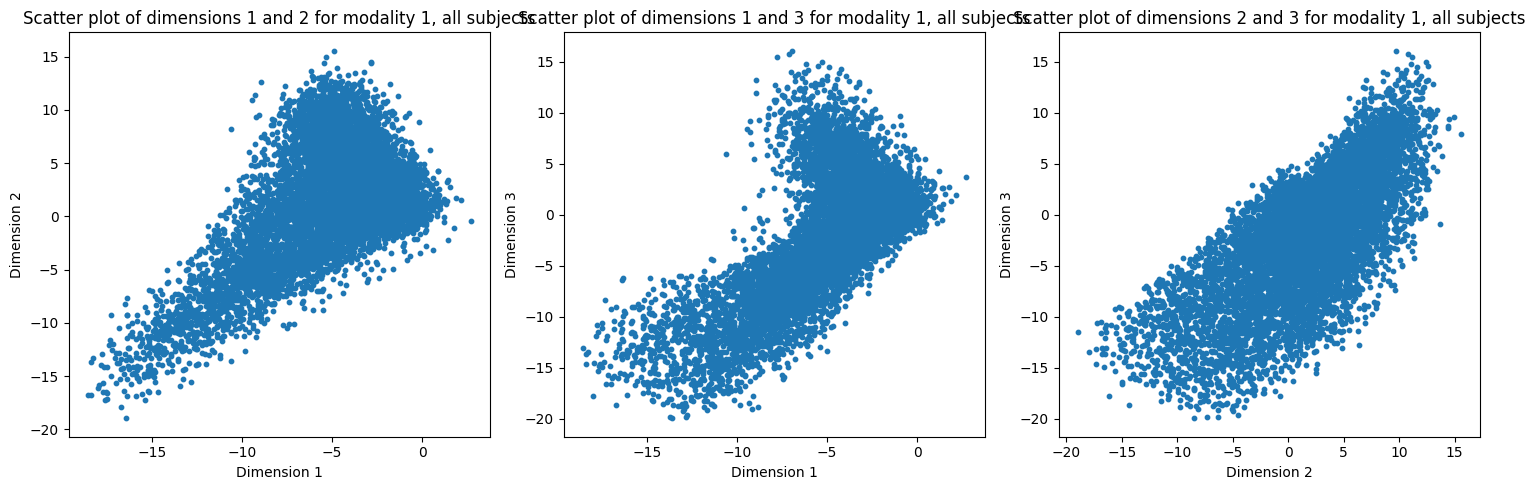

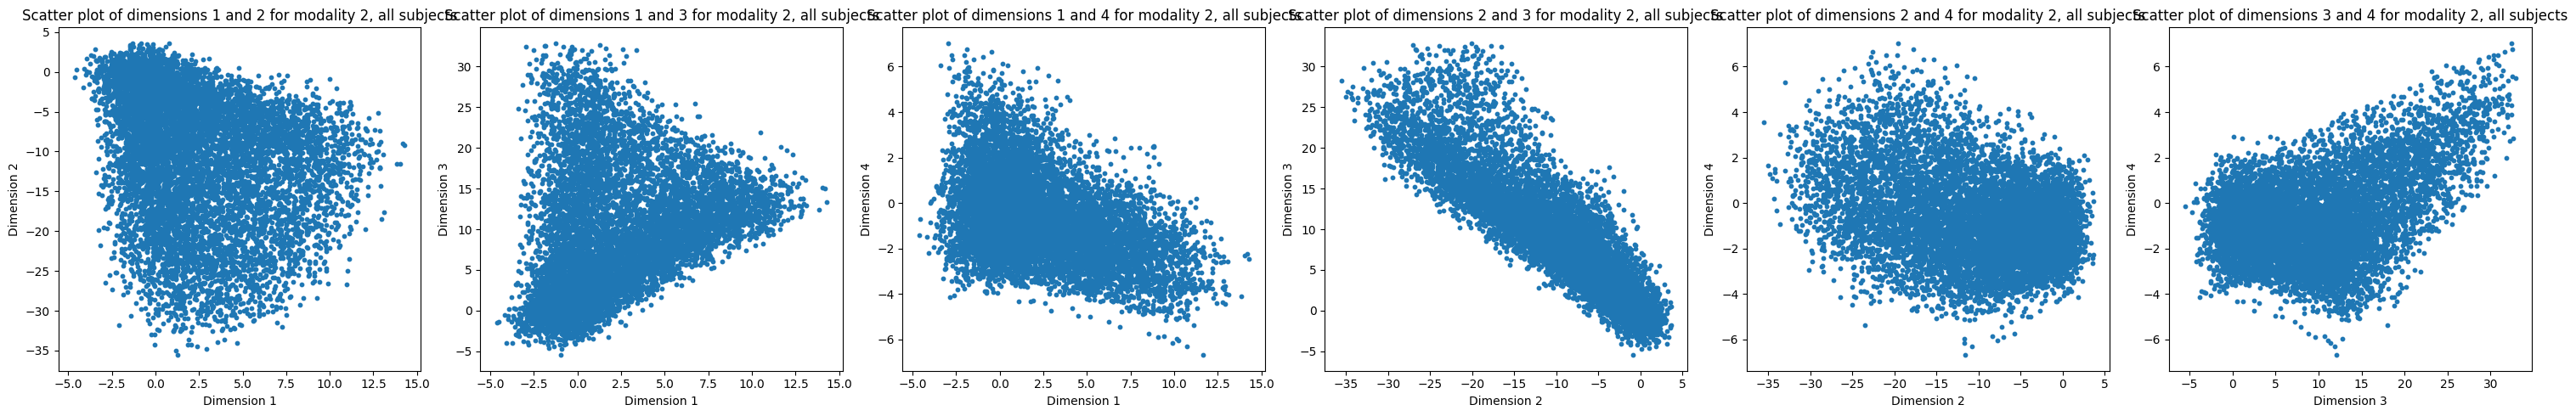

In [48]:
hf.plot_scatter_pairs_observed(y_actual)

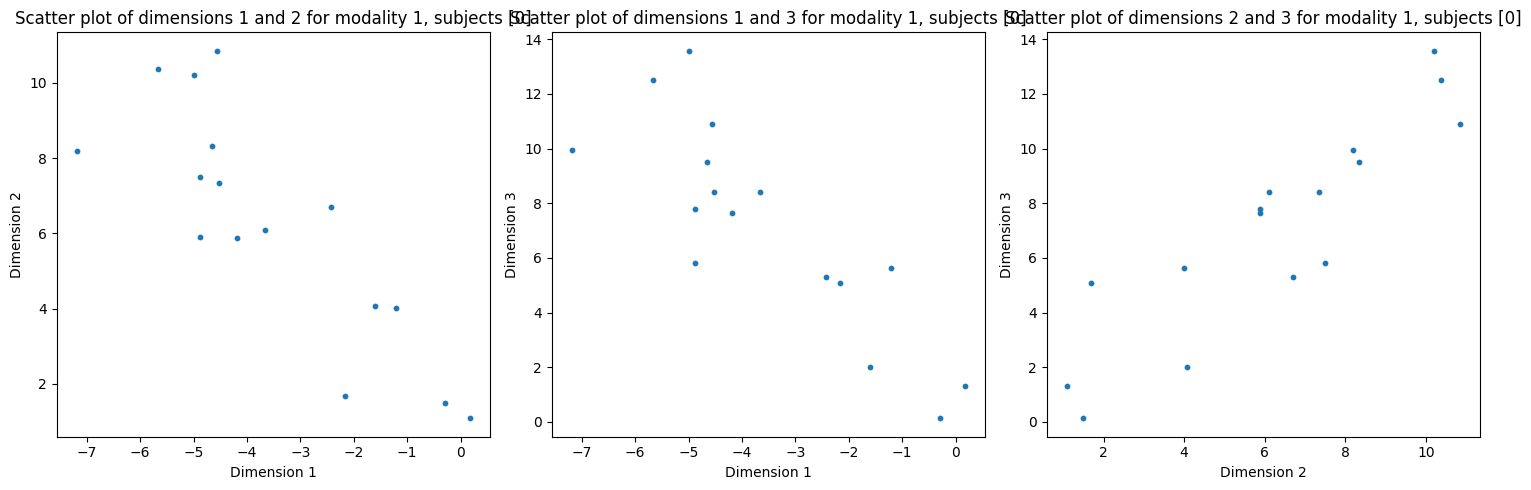

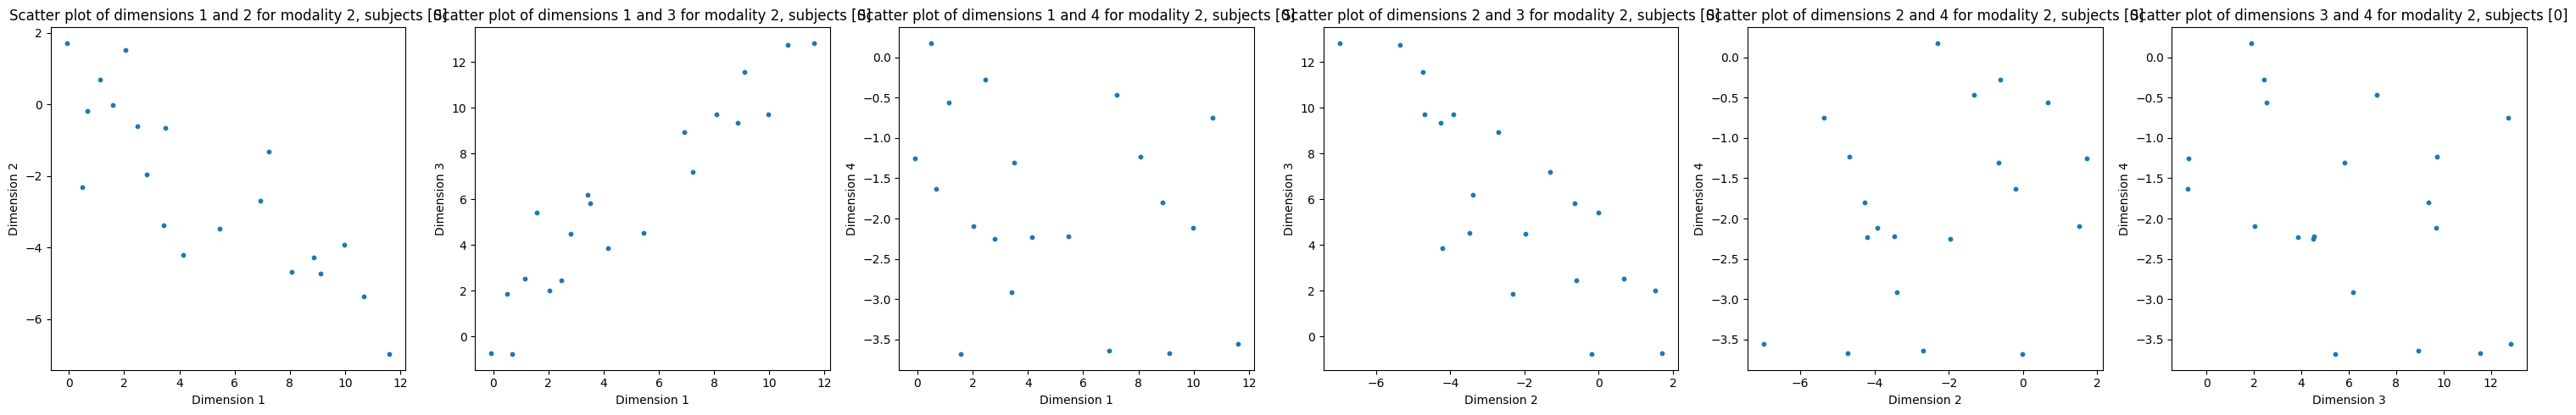

In [49]:
hf.plot_scatter_pairs_observed(y_actual, subject_indices=[0])

## Fitting data to the model

In [50]:
# Parameter Initialization
mu_init, omega_init, w_init, v_init, sigma2_init = hf.random_params(d, q, seed=None)
mu_init, omega_init, w_init, v_init, sigma2_init

([array([-0.97219584,  0.71655346,  0.90873037]),
  array([-0.84942822, -0.67038549, -0.38135511, -0.67027658])],
 [array([0.20620723, 0.22109496, 0.24301127]),
  array([0.03689409, 0.43591185, 0.14489284, 0.81490158])],
 [array([[ 0.19610944, -0.83643068],
         [ 0.57620621,  0.57221643],
         [-0.36476581, -0.76486929]]),
  array([[-0.56682386,  0.30364611],
         [ 0.85878935, -0.42173148],
         [-0.19571844,  0.06937232],
         [ 0.03478193,  0.9893853 ]])],
 [array([[-0.21366171, -0.29331475],
         [ 0.41090474, -0.26578022],
         [ 0.18005695, -0.67465665]]),
  array([[-0.77964148, -0.72808621],
         [ 0.51255598, -0.81114881],
         [ 0.25974533,  0.57492525],
         [ 0.39804355, -0.10528997]])],
 [1.662491647387361, 1.5420856677005936])

In [51]:
mu_actual, omega_actual, w_actual, v_actual, sigma2_actual

([array([-0.77302306,  0.94896619,  0.45746927]),
  array([-0.96501946,  0.78314653, -0.43027767, -0.40204725])],
 [array([-0.29706439,  0.41521028,  0.5992092 ]),
  array([ 0.58406852, -0.35105881,  0.72942077, -0.10497474])],
 [array([[ 0.29112371, -0.17080079],
         [ 0.41206202, -0.50670124],
         [-0.48801514, -0.95197729]]),
  array([[ 0.09645981, -0.28565601],
         [-0.77537595, -0.71620569],
         [-0.11008185,  0.46396045],
         [-0.07979754,  0.18548882]])],
 [array([[-0.80254809, -0.39912713],
         [ 0.28171136, -0.3555841 ],
         [-0.62901172,  0.8343871 ]]),
  array([[-0.32657229, -0.09114436],
         [-0.62574445, -0.18232957],
         [-0.73579592, -0.92577937],
         [-0.83602434, -0.5731201 ]])],
 [1.27092080337477, 1.5452292637147478])

In [52]:
w_opt, v_opt, mu_opt, omega_opt, sigma2_opt, training_history = hf.fit(y_actual, w_init, v_init, mu_init, omega_init, sigma2_init, t, n_epochs=400, history=True)

## Likelihood Convergence

In [53]:
training_history

array([[-104857.99303823,  -90274.65758879,  -82184.84772879,
         -77129.67365376,  -74039.37185298,  -72170.63019946,
         -71019.35471269,  -70266.61771104,  -69719.87547756,
         -69265.70946258,  -68837.89118276,  -68398.24828213,
         -67926.0463625 ,  -67411.91876528,  -66853.58786888,
         -66252.36354497,  -65610.81818664,  -64932.00859452,
         -64219.63657451,  -63478.22835031,  -62712.98989404,
         -61929.49274325,  -61133.38926405,  -60330.22721558,
         -59525.35005765,  -58723.84982524,  -57930.5455933 ,
         -57149.97014097,  -56386.35458546,  -55643.60568362,
         -54925.27416062,  -54234.51535189,  -53574.04575737,
         -52946.10070293,  -52352.39900916,  -51794.12026934,
         -51271.89907935,  -50785.83857807,  -50335.54333604,
         -49920.16941643,  -49538.48770867,  -49188.95563416,
         -48869.79209414,  -48579.05096566,  -48314.68934404,
         -48074.6278486 ,  -47856.80144373,  -47659.20023368,
        

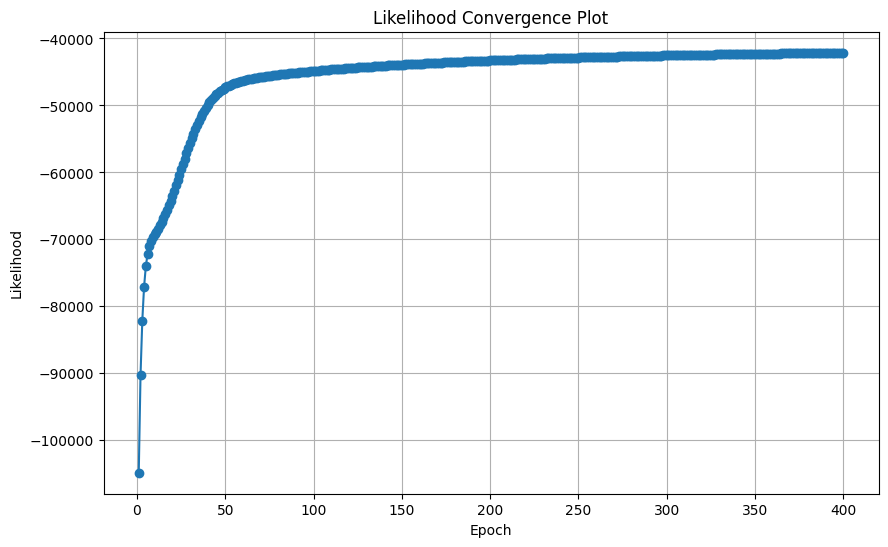

In [54]:
hf.plot_likelihood(training_history)

## Reconstruction

In [55]:
posterior_mean, _, posterior_variance = hf.posterior_moments(y_actual, w_opt, v_opt, mu_opt, omega_opt, sigma2_opt, t)
posterior_mean, posterior_variance

(array([[-1.14152539e+00, -1.86514519e-01],
        [-1.23191764e+00, -1.27529452e-01],
        [-1.14513485e+00, -7.89392999e-02],
        [-1.19505540e+00, -6.77200071e-02],
        [-1.15721681e+00, -8.31314717e-02],
        [-1.14610490e+00, -2.09738442e-01],
        [-1.09207651e+00, -1.36780127e-01],
        [-1.12288732e+00, -1.26343417e-01],
        [-1.20097739e+00, -2.39005850e-01],
        [-1.08083984e+00, -9.66472721e-02],
        [-1.17114715e+00, -8.76919867e-02],
        [-1.08892645e+00, -2.05371655e-01],
        [-1.15231421e+00, -1.29561322e-01],
        [-1.13007858e+00, -1.78961665e-01],
        [-1.10024151e+00, -9.97648949e-02],
        [-1.16574373e+00, -1.17577533e-01],
        [-1.19556584e+00, -2.07385510e-01],
        [-1.15799959e+00, -1.75574800e-01],
        [-1.18048868e+00,  4.62086139e-04],
        [-1.21842058e+00, -5.97803211e-02],
        [-1.08662450e+00, -8.97411498e-02],
        [-1.07041773e+00, -7.48788414e-02],
        [-1.11093026e+00, -1.382

In [56]:
x_recon = np.zeros((n, q))
for i in range(n):
    rnd = np.random.default_rng()
    x_recon[i] = rnd.multivariate_normal(mean=posterior_mean[i], cov=posterior_variance[i])
x_recon

array([[-1.13332197e+00, -1.81666148e-01],
       [-1.23133093e+00, -1.42355075e-01],
       [-1.16524516e+00, -6.47321305e-02],
       [-1.17685083e+00, -8.21440121e-02],
       [-1.16187868e+00, -8.89243688e-02],
       [-1.11195649e+00, -2.17412334e-01],
       [-1.09235144e+00, -1.25765902e-01],
       [-1.14336437e+00, -1.21124806e-01],
       [-1.19152025e+00, -2.23444993e-01],
       [-1.10847089e+00, -7.81619173e-02],
       [-1.18476069e+00, -8.26337635e-02],
       [-1.10125214e+00, -2.05085231e-01],
       [-1.16912598e+00, -1.15616828e-01],
       [-1.12322201e+00, -1.73749252e-01],
       [-1.10768986e+00, -9.23874598e-02],
       [-1.16486913e+00, -1.14591128e-01],
       [-1.18386673e+00, -1.95491020e-01],
       [-1.15513116e+00, -1.87569513e-01],
       [-1.19711170e+00, -9.24119899e-03],
       [-1.22668172e+00, -5.71317903e-02],
       [-1.10045440e+00, -8.91826633e-02],
       [-1.06922549e+00, -6.47389987e-02],
       [-1.10512642e+00, -1.35715787e-01],
       [-1.

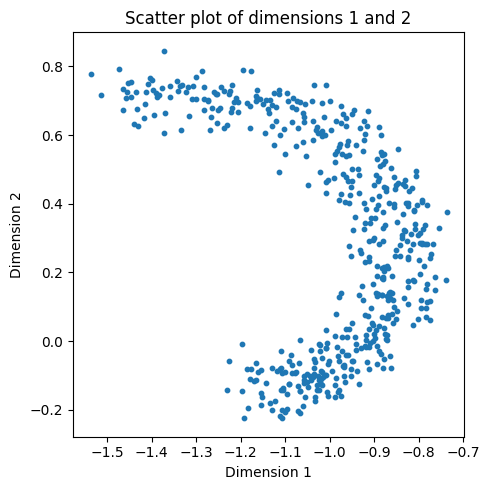

In [57]:
hf.plot_scatter_pairs_latent(x_recon)

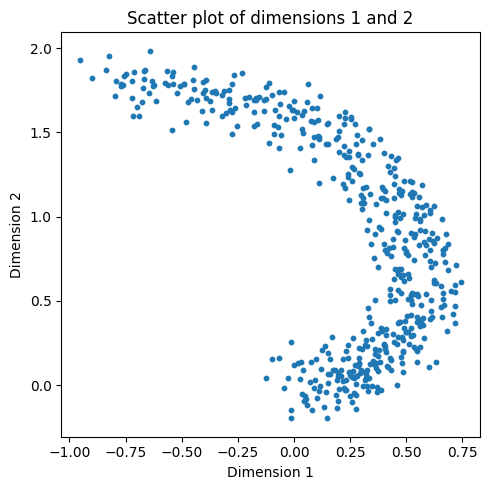

In [58]:
hf.plot_scatter_pairs_latent(x_actual)

In [59]:
y_recon = hf.decode(x_recon, w_opt, v_opt, mu_opt, omega_opt, sigma2_opt, t, seed=None, noise=True)

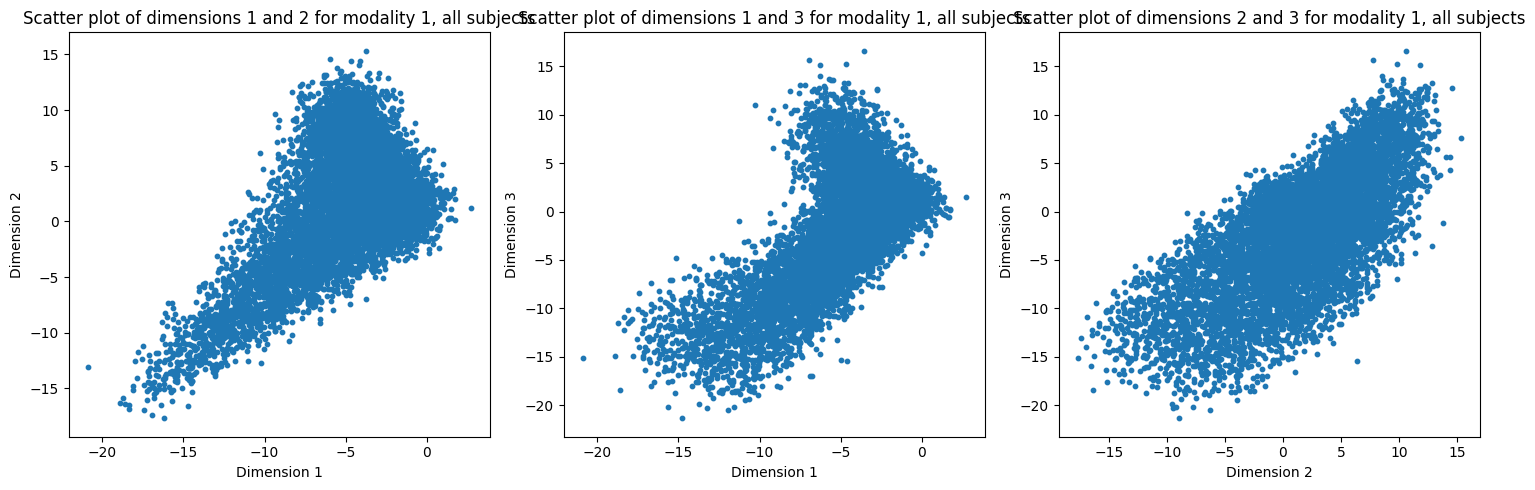

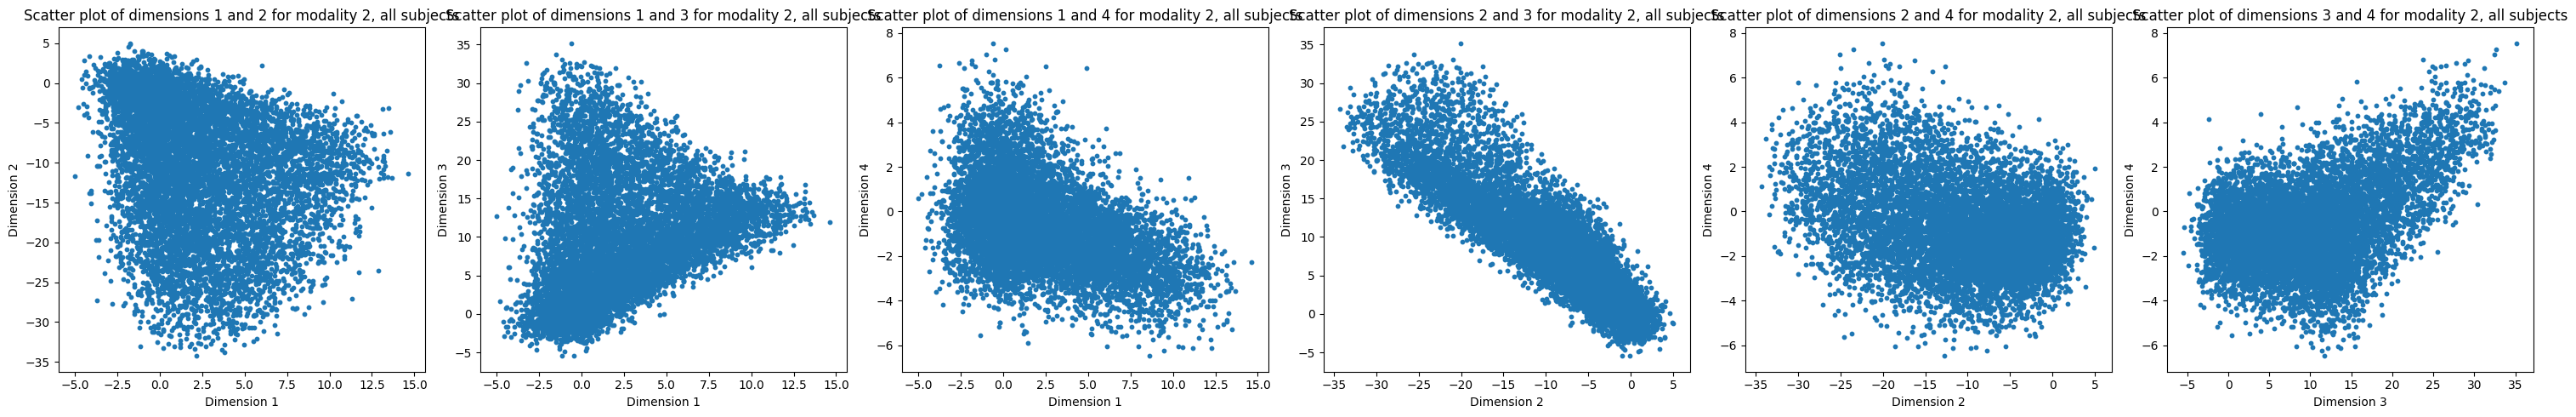

In [60]:
hf.plot_scatter_pairs_observed(y_recon)

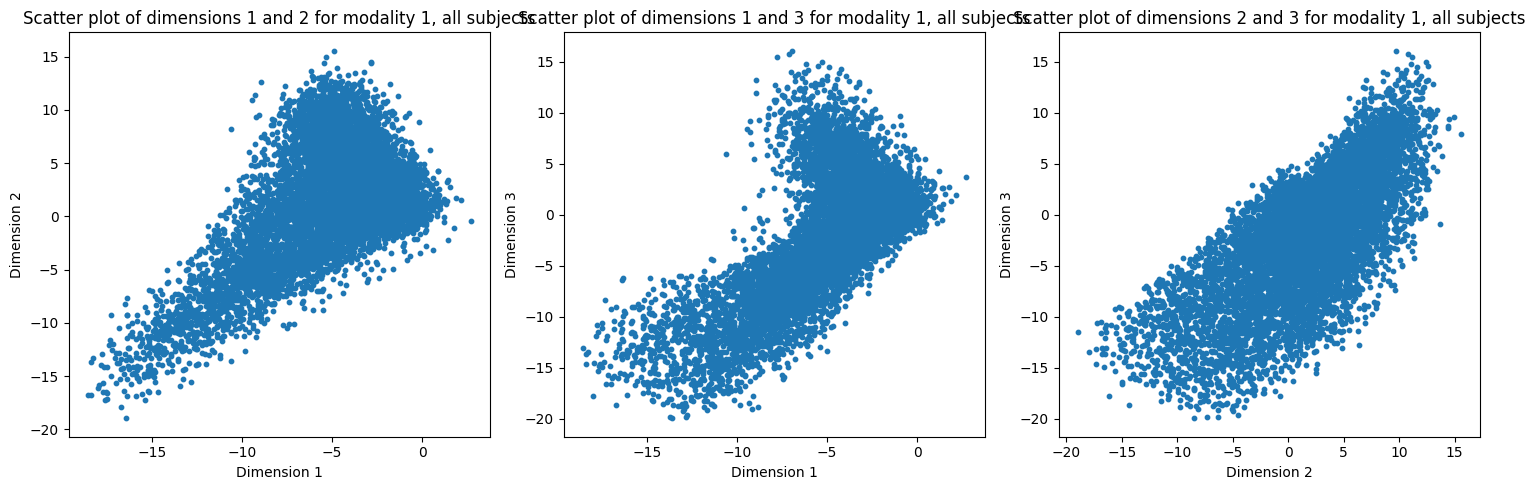

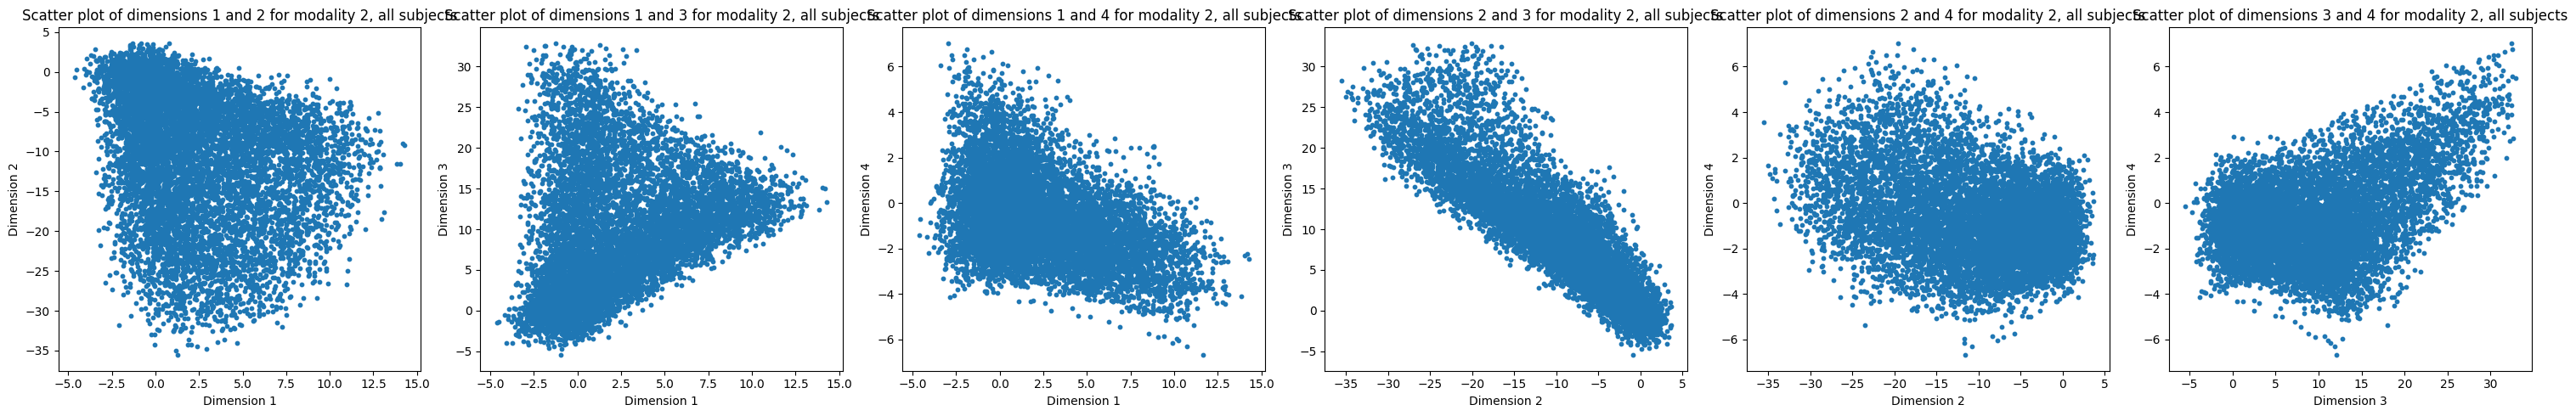

In [61]:
hf.plot_scatter_pairs_observed(y_actual)

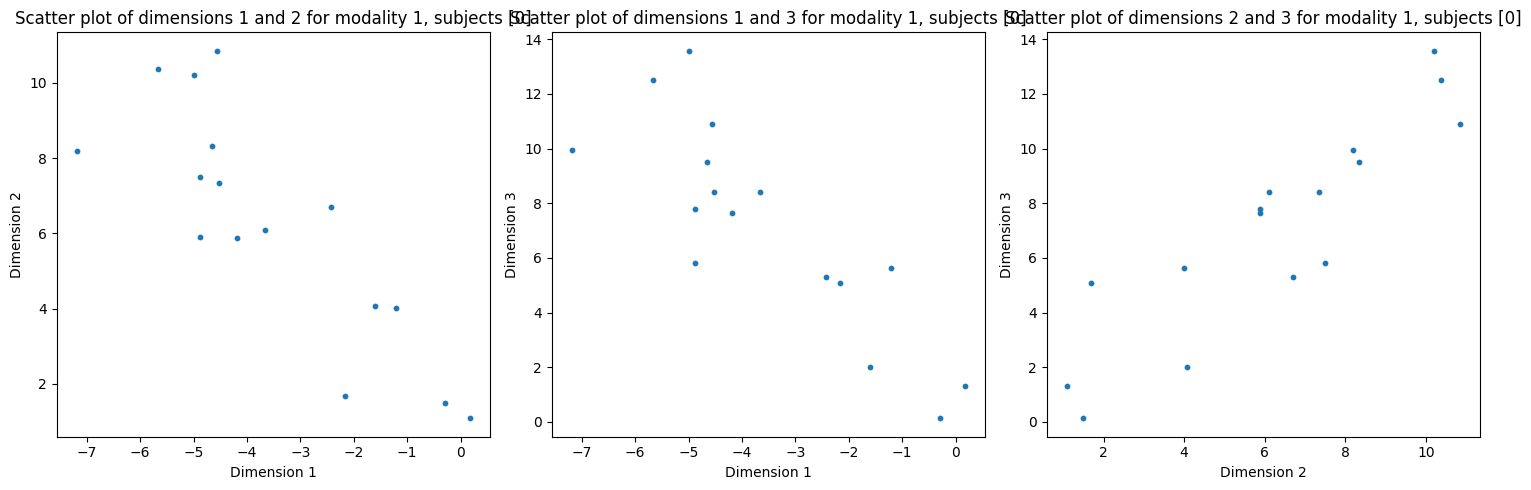

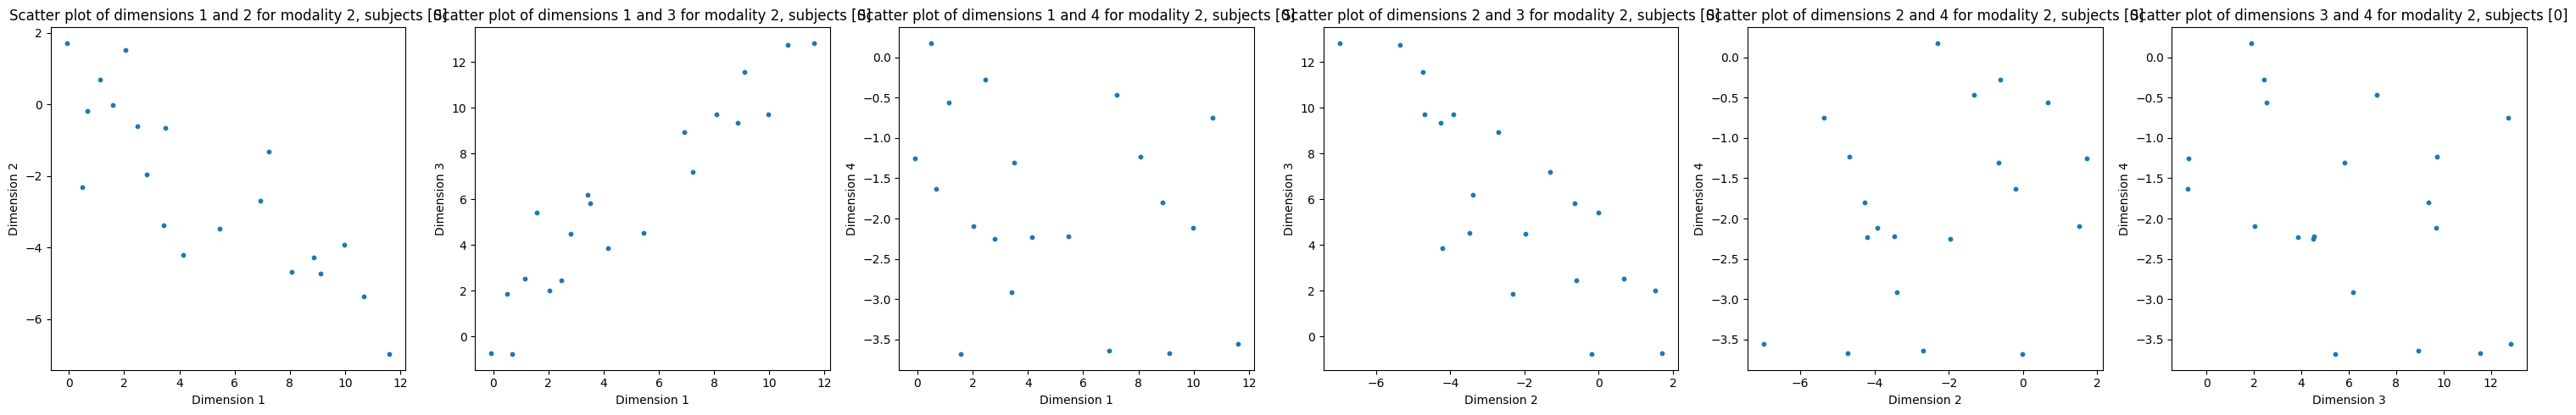

In [62]:
hf.plot_scatter_pairs_observed(y_actual, subject_indices=[0])

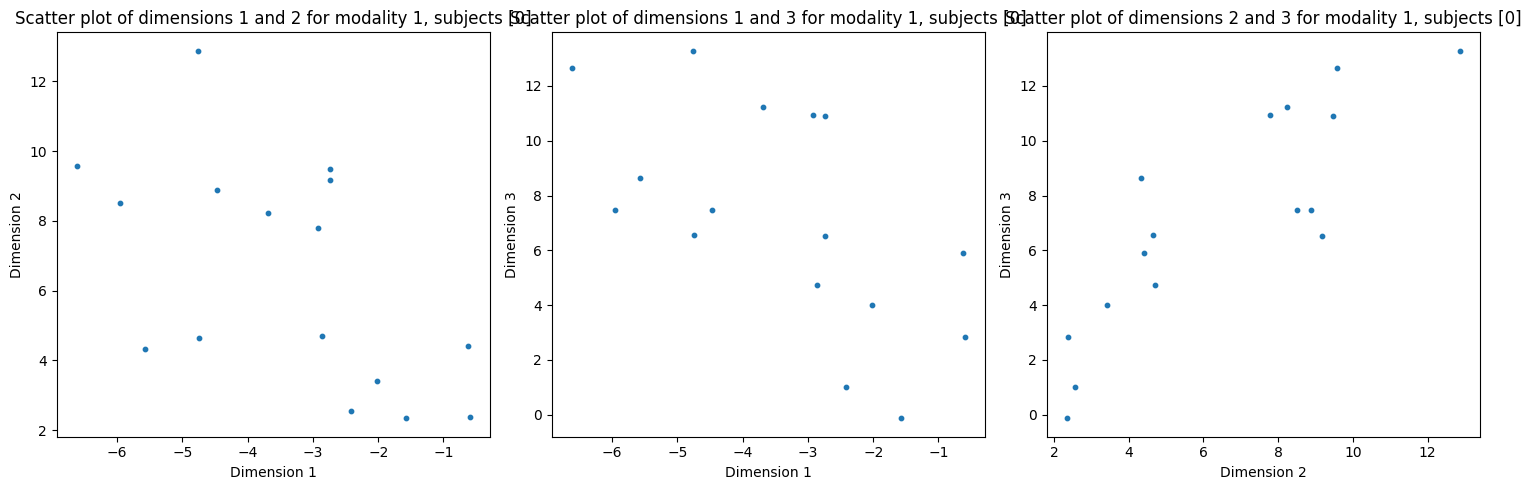

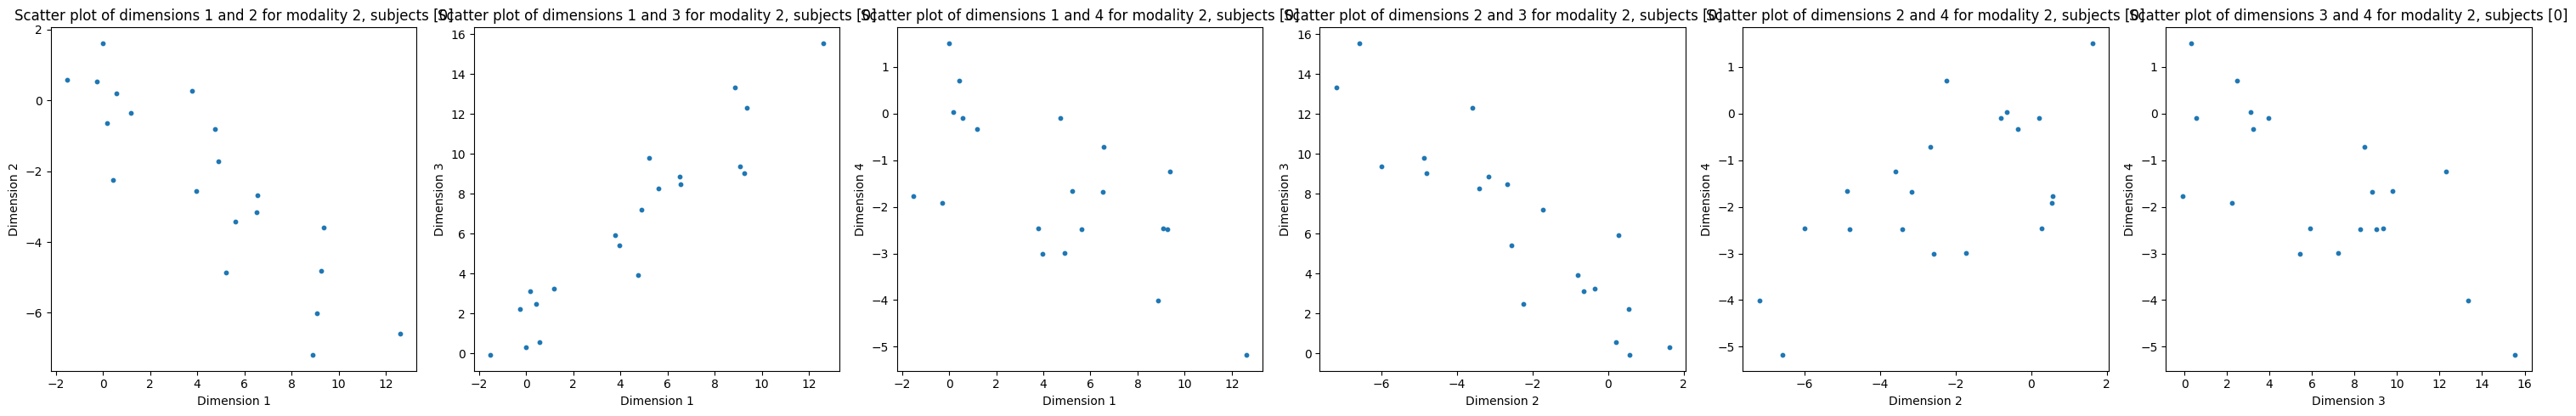

In [63]:
hf.plot_scatter_pairs_observed(y_recon, subject_indices=[0])